In [1]:
#Description: This program Uses the Stochastic Relative Strengt Index (stochRSI) indicator and python to determine if an asset is over bought or over sold
# import liberies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [2]:
# Load the data
df=yf.Ticker('AAPL').history(start='2010-1-4',end='2022-12-3')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04,6.497554,6.530129,6.465589,6.515212,493729600,0.0,0.0
2010-01-05,6.533176,6.563314,6.492076,6.526478,601904800,0.0,0.0
2010-01-06,6.526476,6.552353,6.415966,6.422664,552160000,0.0,0.0
2010-01-07,6.446411,6.454022,6.364213,6.410791,477131200,0.0,0.0
2010-01-08,6.402267,6.454021,6.364518,6.453412,447610800,0.0,0.0
...,...,...,...,...,...,...,...
2022-11-28,145.139999,146.639999,143.380005,144.220001,69246000,0.0,0.0
2022-11-29,144.289993,144.809998,140.350006,141.169998,83763800,0.0,0.0
2022-11-30,141.399994,148.720001,140.550003,148.029999,111224400,0.0,0.0


In [3]:
#Create an Exponential Moving Average indicator function
def EMA(data,period=20,column='Close'):
    return data[column].ewm(span=period,adjust=False).mean()

In [4]:
#Create a function to calculate the Stochastic Relative Stregnth Index
def StochRSI(data,period=800,column='Close'):
    delta=data[column].diff(1)
    delta=delta.dropna()
    up=delta.copy()
    down=delta.copy()
    up[up<0]=0
    down[down>0]=0
    data['up']=up
    data['down']=down
    AVG_Gain=EMA(data,period,column='up')
    AVG_Loss=abs(EMA(data,period,column='down'))
    RS=AVG_Gain/AVG_Loss
    RSI=100.0-(100.0/(1.0+RS))
    Stockrsi=(RSI-RSI.rolling(period).min())/(RSI.rolling(period).max()-RSI.rolling(period).min())
    return Stockrsi

In [5]:
#Store the Stochastic RSI data in a new column
df['StochRSI']=StochRSI(df)

In [6]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,up,down,StochRSI
Date,,,,,,,,,,
2010-01-04,6.497554,6.530129,6.465589,6.515212,493729600,0.0,0.0,NaN,NaN,NaN
2010-01-05,6.533176,6.563314,6.492076,6.526478,601904800,0.0,0.0,0.011266,0.000000,NaN
2010-01-06,6.526476,6.552353,6.415966,6.422664,552160000,0.0,0.0,0.000000,-0.103814,NaN
2010-01-07,6.446411,6.454022,6.364213,6.410791,477131200,0.0,0.0,0.000000,-0.011872,NaN
2010-01-08,6.402267,6.454021,6.364518,6.453412,447610800,0.0,0.0,0.042621,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-11-28,145.139999,146.639999,143.380005,144.220001,69246000,0.0,0.0,0.000000,-3.889999,0.055918
2022-11-29,144.289993,144.809998,140.350006,141.169998,83763800,0.0,0.0,0.000000,-3.050003,0.035443
2022-11-30,141.399994,148.720001,140.550003,148.029999,111224400,0.0,0.0,6.860001,0.000000,0.079270


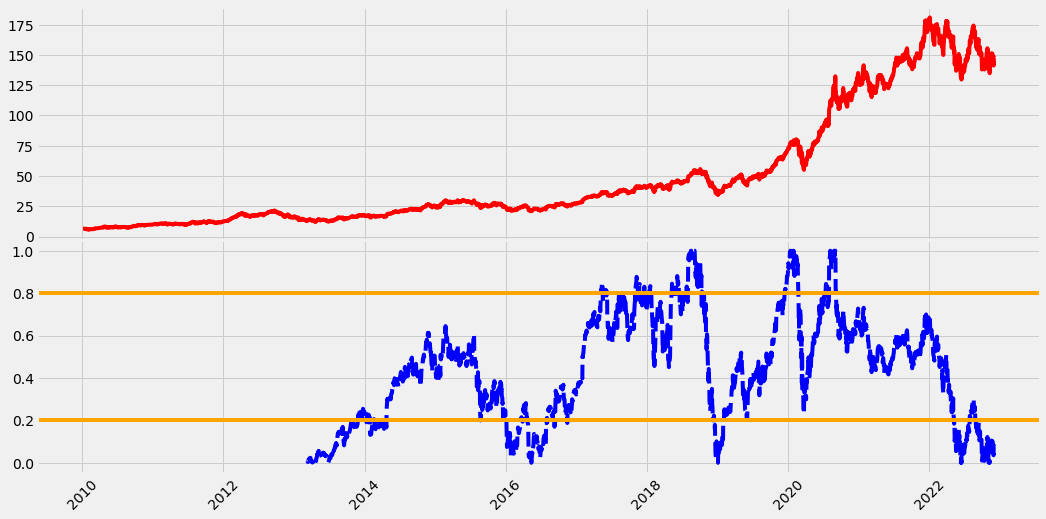

In [7]:
#plot the data
#Create a figure and a set of subplots
fig,(ax1,ax2)=plt.subplots(nrows=2,sharex=True,figsize=(16,8))
plt.subplots_adjust(hspace=.0)
#set grid lines
#plot the Close Price
ax1.plot(np.array(df.index),df['Close'].values,color='r')
#Plot the StochRSI
ax2.plot(np.array(df.index),df['StochRSI'].values,color='b',linestyle='--')
ax2.axhline(0.20,color='orange')
ax2.axhline(0.80,color='orange')
plt.xticks(rotation=45)
plt.show()